# TASK: 1

Visiting: A
Visiting: B
Visiting: D
Goal found!
Path: A -> B -> D -> E
Time complexity: 4
Space complexity: 2


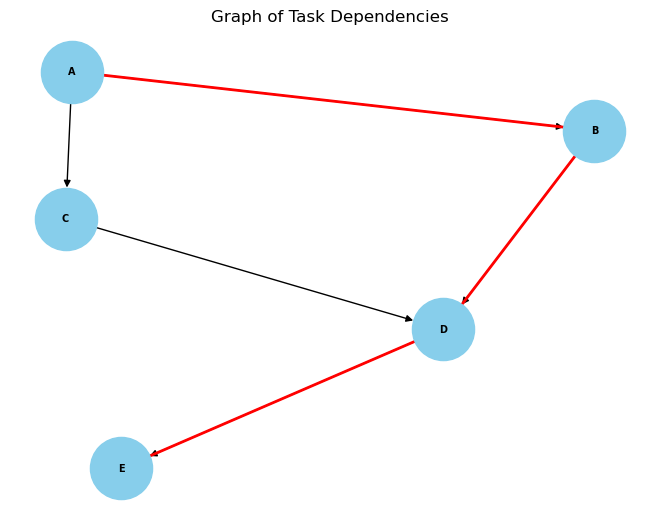

In [2]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.adjacency_list = {}
        self.heuristic = {}

    def add_edge(self, node, neighbor):
        if node not in self.adjacency_list:
            self.adjacency_list[node] = []
        self.adjacency_list[node].append(neighbor)

    def set_heuristic(self, node, heuristic):
        self.heuristic[node] = heuristic

    def best_first_search(self, start, goal):
        visited = set()
        priority_queue = [(self.heuristic[start], start, [])]
        heapq.heapify(priority_queue)
        
        iterations = 0
        max_queue_size = 0
        
        while priority_queue:
            iterations += 1 
            max_queue_size = max(max_queue_size, len(priority_queue))
            
            current_cost, current_node, path = heapq.heappop(priority_queue)
            visited.add(current_node)
            path = path + [current_node]
            if current_node == goal:
                print("Goal found!")
                print("Path:", ' -> '.join(path))
                print("Time complexity:", iterations)
                print("Space complexity:", max_queue_size)
                return path
            print("Visiting:", current_node)
            for neighbor in self.adjacency_list.get(current_node, []):
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (self.heuristic[neighbor], neighbor, path))  # heuristic value as the priority
                    visited.add(neighbor)
        print("Goal not found!")
        return None

graph = Graph()
graph.add_edge('A', 'B')
graph.add_edge('A', 'C')
graph.add_edge('B', 'D')
graph.add_edge('C', 'D')
graph.add_edge('D', 'E')

graph.set_heuristic('A', 4)
graph.set_heuristic('B', 3)
graph.set_heuristic('C', 3)
graph.set_heuristic('D', 1)
graph.set_heuristic('E', 0)

start_node = 'A'
goal_node = 'E'
path = graph.best_first_search(start_node, goal_node)


G = nx.DiGraph()
for node, neighbors in graph.adjacency_list.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=7, font_weight='bold')


path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

plt.title('Graph of Task Dependencies')
plt.show()


# TASK: 2

Goal found! Path: A -> C -> F
Time complexity: 3
Space complexity: 2


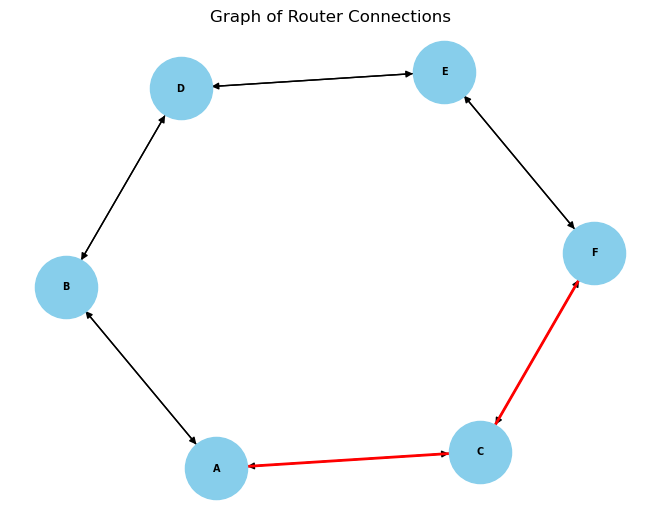

In [3]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx

def manhattan_distance(x1, y1, x2, y2):
    return abs(x1 - x2) + abs(y1 - y2)

class Graph:
    def __init__(self):
        self.edges = {}
        self.heuristic = {}

    def add_edge(self, node1, node2, cost):
        if node1 not in self.edges:
            self.edges[node1] = []
        if node2 not in self.edges:
            self.edges[node2] = []
        self.edges[node1].append((node2, cost))
        self.edges[node2].append((node1, cost))

    def a_star_search(self, start, goal):
        queue = [(0, start, [])]
        visited = []
        iterations = 0
        max_queue_size = 1
        while queue:
            iterations += 1
            (cost, node, path) = heapq.heappop(queue)
            if node not in visited:
                path = path + [node]
                visited.append(node)
                if node == goal:
                    print("Goal found! Path:", ' -> '.join(path))
                    print("Time complexity:", iterations)
                    print("Space complexity:", max_queue_size)
                    return cost, path
            for (next_node, edge_cost) in self.edges[node]:
                if next_node not in visited:
                    total_cost = cost + edge_cost + self.heuristic[next_node]
                    heapq.heappush(queue, (total_cost, next_node, path))
                    max_queue_size = max(max_queue_size, len(queue))
        print("Goal not found!")


# x and y coordinates to each node
coordinates = {
    'A': (3, 1),
    'B': (1, 2),
    'C': (5, 2),
    'D': (1, 4),
    'E': (3, 5),
    'F': (5, 5)
}

graph = Graph()
graph.add_edge('A', 'B', 3)
graph.add_edge('B', 'D', 5)
graph.add_edge('D', 'E', 4)

graph.add_edge('E', 'F', 0)
graph.add_edge('A', 'C', 3)
graph.add_edge('C', 'F', 0)


goalx, goaly = coordinates['F']
for node, (x, y) in coordinates.items():
    graph.heuristic[node] = manhattan_distance(x, y, goalx, goaly)

start_node = 'A'
goal_node = 'F'
cost, path = graph.a_star_search(start_node, goal_node)


G = nx.DiGraph()
for node, neighbors in graph.edges.items():
    for neighbor, _ in neighbors:
        G.add_edge(node, neighbor)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=7, font_weight='bold')


path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

plt.title('Graph of Router Connections')
plt.show()
